In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import astroquery as aq
from astropy.io import fits
import exofop
from exofop.download import System, SystemDownloader
from exofop.extract import LightCurveTableList
from astropy.io import fits as pyfits
from astropy.modeling import models
import astropy.units as u
from specutils import Spectrum, SpectralRegion
import warnings
from specutils.spectra import Spectrum, SpectralRegion
from specutils.fitting import fit_generic_continuum
from specutils.spectra.spectrum import Spectrum
from specutils.fitting.continuum import fit_continuum

In [3]:
#This is data where I removed all data points that didn't cover 3900 to 6800 Angstroms or had an SNR < 70
table = pd.read_excel(r'C:\Users\brajo\Downloads\filteredEXOFOPdata.xlsx')

In [4]:
k = 0
for i in range(0, 4282):
    cell_value = table.at[i, "Instrument"]
    if cell_value == "FIES":
        k=k+1

print(k)

239


In [5]:
#This number will go up as I download more and more
n = 45
ticIDs = np.zeros(n)
prefix = "TIC_"
k = 0
for i in range(1, 4282):
    cell_value = table.at[i, "Instrument"]
    if cell_value == "FIES":  
        if table.at[i, "SNR/resolution element"] > 70:
            if k > 0:
                if table.at[i, "TIC ID"] != table.at[i-1, "TIC ID"]:
                    ticIDs[k] = table.at[i, "TIC ID"]
                    k = k+1
           
            else:
                ticIDs[k] = table.at[i, "TIC ID"]
                k = k+1
    if ticIDs[n-1] != 0:
        break
#Need to turn it into an integer array first to get rid of .0's at the end, then into strings to I can add TIC_ to the start
ticIDs = ticIDs.astype(int)
ticIDs = ticIDs.astype(str)
ticIDs = np.char.add(prefix, ticIDs)
print(ticIDs)

['TIC_4646810' 'TIC_20182165' 'TIC_21832928' 'TIC_26433869' 'TIC_27194429'
 'TIC_65672998' 'TIC_67418624' 'TIC_70887357' 'TIC_117789567'
 'TIC_117979455' 'TIC_136971594' 'TIC_138588540' 'TIC_158025009'
 'TIC_160039081' 'TIC_164173105' 'TIC_172518755' 'TIC_189013224'
 'TIC_198213332' 'TIC_198356533' 'TIC_198457103' 'TIC_224600500'
 'TIC_229384040' 'TIC_233059608' 'TIC_237184773' 'TIC_237222864'
 'TIC_250484865' 'TIC_264678534' 'TIC_283829553' 'TIC_293617835'
 'TIC_306263608' 'TIC_310231275' 'TIC_352413427' 'TIC_354006740'
 'TIC_368435330' 'TIC_372264750' 'TIC_375506058' 'TIC_396356111'
 'TIC_406672232' 'TIC_407966340' 'TIC_417931607' 'TIC_427761355'
 'TIC_440100539' 'TIC_440801822' 'TIC_445805961' 'TIC_459978312']


In [6]:
data_dir = "./tmp"
# Downloading Data
#This is the only line that needs to change here I think?? Just need to update it based on what star I'm looking at
system = System(ticIDs[0])
system_loader = SystemDownloader(
    system=system,
    data_dir=data_dir,
)

# Selecting tags and downloading them
#Idk why I have to use await, but code does not work properly otherwise. 
tags = system_loader.spectroscopy.tags
await system_loader.download(tags[:5], unzip=True)

# Extracting Light Curve Data
target_dir = system_loader.target_dir
lctl = LightCurveTableList.load_exofop_data(
    target_dir=target_dir,
)
lctl.standardise_column_names()
lctl.apply_time_correction_in_case_of_discrepancy()

# Save the extracted data as a single ECSV file for future reference
lctl.save()

INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=95294 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='95294.zip': OK
INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=1950 "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=2897 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='1950.zip': OK
INFO:exofop.download:file_name='2897.zip': OK
INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=5451 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='5451.zip': OK
INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=2228 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='2228.zip': OK
INFO:exofop.download.downloaders:Downloaded 5 of 5 files (100.0 %) successfully.
INFO:exofop.download.downloaders:Successfully downloaded 5 files in 7.915770000079647 seconds.
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_4646810\\zip\\temp_extract\\exofop_1950_tagid_job53602' -> './tmp\\TIC_4646810\\1950'
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_4646810\\zip\\temp_extract\\exofop_2228_tagid_job58667' -> './tmp\\TIC_4646810\\2228'
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_4646810\\zip\\temp_extract\\exofop_2897_tagid_job58667' -> './tmp\\TIC_4646810\\2897'
ERROR:exofop.download.downloaders:An OSError occurred with er

In [7]:
#From Microsoft copilot
#File name in case I delete it: '/Users/brajo/Downloads/exofop_95294_tagid_job43047/exofop_95294_tagid_job43047/TIC4646810S-ct20201221_1126.fits'
try:
    # Open the FITS file
    with fits.open('/Users/brajo/Downloads/exofop_95294_tagid_job43047/exofop_95294_tagid_job43047/TIC4646810S-ct20201221_1126.fits') as hdul:
        # Print a summary of all HDUs (Header/Data Units)
        hdul.info()

        print("\n=== Primary HDU Header ===")
        print(repr(hdul[0].header))  # repr() keeps formatting intact

        # If you want to see headers of all HDUs:
        # for i, hdu in enumerate(hdul):
        #     print(f"\n--- Header of HDU {i} ---")
        #     print(hdu.header)

except FileNotFoundError:
    print(f"Error: File '{'/Users/brajo/Downloads/exofop_95294_tagid_job43047/exofop_95294_tagid_job43047/TIC4646810S-ct20201221_1126.fits'}' not found.")
except OSError as e:
    print(f"Error opening FITS file: {e}")
#End Copilot

Filename: /Users/brajo/Downloads/exofop_95294_tagid_job43047/exofop_95294_tagid_job43047/TIC4646810S-ct20201221_1126.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     176   (2, 3200, 59)   float32   


 [astropy.io.fits.verify]




=== Primary HDU Header ===
SIMPLE  =                    T / Written by IDL:  Mon Dec 21 13:35:17 2020      
BITPIX  =                  -32 /  IEEE single precision floating point          
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                    2 / Axis 1 length: 0=wavelength, 1=spectrum        
NAXIS2  =                 3200 / Axis 2 length: extracted pixels along each eche
NAXIS3  =                   59 / Axis 3 length: number of echelle orders extract
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                    0 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBJECT  = 'T0004646810'        / Name of object observed                        


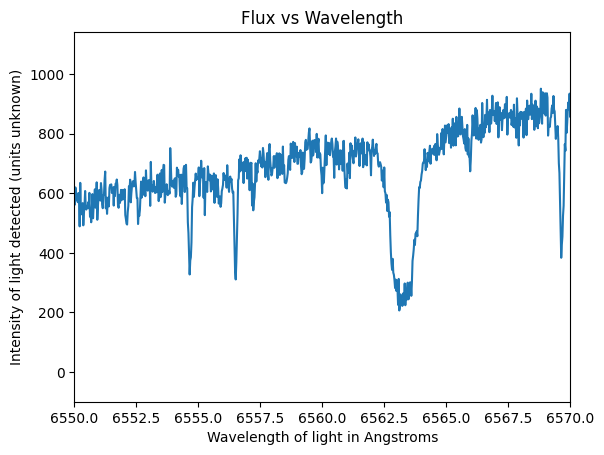

In [8]:
star1 = fits.open('/Users/brajo/Downloads/exofop_95294_tagid_job43047/exofop_95294_tagid_job43047/TIC4646810S-ct20201221_1126.fits')
star = star1[0].data
#Number of elements 188800. 59 orders, 3200 entries per order
#Actually there's only 185599. This isn't a multiple of 59 or 3200 so IDK where it comes from

wavelengths = np.zeros(185599)
flux = np.zeros(185599)

for k in range(0, 58):
    usefuldata = star[k]

    for i in range(0, 3199):
        wavelengths[i+3200*k] = usefuldata[i][0]
        flux[i+3200*k] = usefuldata[i][1]

plotted_data = np.column_stack((wavelengths, flux))


# From copilot
sorted_plotted_data = plotted_data[plotted_data[:,0].argsort()]
# End copilot



plt.plot(sorted_plotted_data[:,0], sorted_plotted_data[:,1])
# plt.ylim(0, 500)
plt.xlim(6550, 6570)
plt.title("Flux vs Wavelength")
plt.xlabel("Wavelength of light in Angstroms")
plt.ylabel("Intensity of light detected (units unknown)")
plt.show()

In [9]:
#This code is to find the order that contains the h-alpha line.
for k in range(0, 58):
    if star[k][0][0] > 6562.8:
        order = k-1
        break

wavelengths1 = np.zeros(3200)
flux1 = np.zeros(3200)

star1 = np.array(star[order])
for i in range(0, 3200):
    wavelengths1[i] = star1[i][0]
    flux1[i] = star1[i][1]

m = 0
# for i in range(0, 3200):
#     if wavelengths[i+1]-wavelengths[i] < 0:
#         m=m+1
#         print(m)
#         print("sad")
#     else:
#         m=m+1


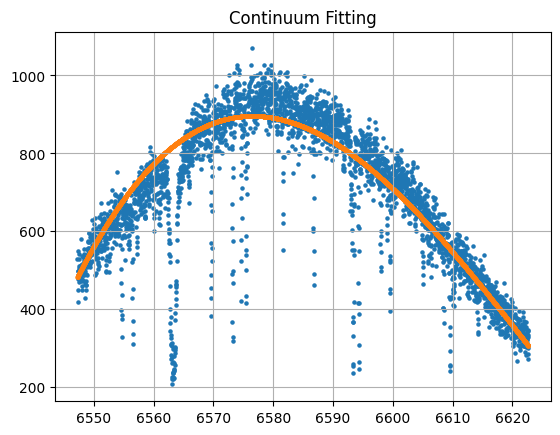

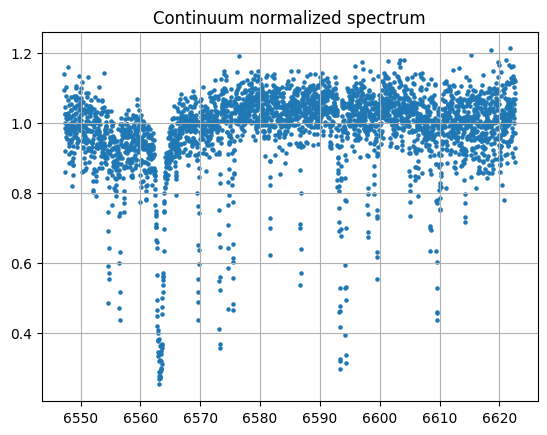

In [10]:
spectrum = Spectrum(flux=flux1*u.Jy, spectral_axis=wavelengths1*u.um)

region = [(6518 * u.um, 6550 * u.um), (6590 * u.um, 6645 * u.um)]
with warnings.catch_warnings():  # Ignore warnings
    warnings.simplefilter('ignore')
    fitted_continuum = fit_continuum(spectrum, window=region)


y_fit = fitted_continuum(wavelengths1*u.um)
f, ax = plt.subplots()
ax.scatter(wavelengths1, flux1, s=5)
ax.scatter(wavelengths1, y_fit, s=5)
ax.set_title("Continuum Fitting")
plt.grid(True)



spec_normalized = spectrum[:] / y_fit

f, ax = plt.subplots()
ax.scatter(spec_normalized.spectral_axis, spec_normalized.flux, s = 5)
ax.set_title("Continuum normalized spectrum")

ax.grid(True)